# The problem of exchanging a key through an insecure channel

For Alice and Bob to comunicate securely they need to stablish a secret key before. For now we've assumed that they do so by meeting in person but what if... they can stablish the key through an insecure channel?. To understand how to do so we need first to understand the discrete logarithm problem. For a different explanation check this [post](https://sebastiaagramunt.medium.com/discrete-logarithm-problem-and-diffie-hellman-key-exchange-821a45202d26).

## Discrete logarithm problem

You may know logarithms from your math class at school. They are pretty simple. The function logarithm is normally represented as

$$y=\log_b(x)$$

where $x$, $y$ and $b$ are related by

$$x=b^y$$

here b is known as the base of the logarithm. The logarithm problem is the problem of finding $y$ knowing $b$ and $x$, i.e. calculate the logarithm of $x$ base $b$. This is straighforward, let's plot the logarithm function:

<Figure size 432x288 with 0 Axes>

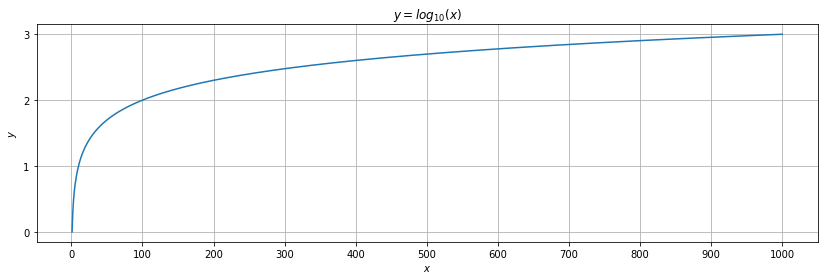

In [49]:
import matplotlib.pyplot as plt
import numpy as np

xmax = 1000
ymax = np.log10(xmax)

x = np.linspace(1, xmax, xmax)
y = np.log10(x)

plt.clf()

fig = plt.figure(figsize=(14,4))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, y)

ax.set_xticks(np.arange(0, xmax+1, xmax//10))
ax.set_yticks(np.arange(0, ymax+1, 1))

ax.set_title("$y=log_{10}(x)$")
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
#ax.set_xscale('log')
plt.grid()


It is easy to find $y$ knowing $x$ and $b$ (in this case $b$=10). What if we move to the modulo $p$ with product group?

The discrete logarithm problem is the problem of **finding $y$** knowing $x$, $p$ (prime) and $g$ (generator for the group of $p$) such that:

$$x=g^y \textit{(mod p)}$$

We take $g$ because it can generate all the possible values $x$ and therefore is more difficult to find $y$ such that the equation above is true. Let's plot this for a certain $p$ and $g$.

In [2]:
from crypto import GeneratePrimeGeneratorPair

p, g = GeneratePrimeGeneratorPair(8)

print(f"Prime number:\n\t{p}\nGenerator:\n\t{g}")

Prime number:
	157
Generator:
	61


In [3]:
y = np.arange(1, p)
x = np.array([pow(g, int(y_),p) for y_ in y])

NameError: name 'np' is not defined

In [4]:
plt.clf()

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)

ax.set_xticks(np.arange(0, p+1, p//10))
ax.set_yticks(np.arange(0, p+1, p//10))

ax.set_title("Discrete Logarithm")
ax.set_xlabel("$x=g^y (mod $p)")
ax.set_ylabel("$y$")
#ax.set_xscale('log')
plt.grid()

NameError: name 'plt' is not defined

The discrete logarithm problem is a difficult problem to solve, there's a priori no way of finding $y$, we have to test all the possible values of $y$.

## How hard is it to find $y$ in the DLP?

We are going to solve the DLP: First we set up the problem by generating a random prime number $p$ of $n$ bits and a corresponding generator $g$. Then randomly pick a value $x$ (spoiler, this will be our secret key) in between 0 and $p$-1. Now the "attack" by randomly sampling values of $y$ in between 0 and $p$-1 and compute $g^y$(mod $p$). When we find the $y$ such that $x=g^y$(mod $p$), then we know the secret $x$.

In [5]:
p, g = GeneratePrimeGeneratorPair(8)

print(f"Prime number:\n\t{p}\nGenerator:\n\t{g}")

Prime number:
	137
Generator:
	42


In [6]:
from random import randrange

def find_y(x:int, p:int , g:int, max_iter:int = 5000) ->int:
    i=0
    while i<max_iter:
        a = randrange(1, p)
        i+=1
        if pow(g, a, p) == x:
            return a
    return None


In [7]:
%%time
x = randrange(1, p)
y = find_y(x, p, g)

assert x==pow(g, y, p), "x not found"

CPU times: user 500 µs, sys: 0 ns, total: 500 µs
Wall time: 504 µs


In [8]:
range(4, 64, 4)

range(4, 64, 4)

In [9]:
from time import time
from random import seed 

times = []
trials = 20
seed(4)

for bits in range(4, 18, 1):
    count = 0
    avg_times = []
    while count < trials:
        p, g = GeneratePrimeGeneratorPair(bits)
        x = randrange(1, p)

        t_start = time()
        y = find_y(x, p, g, 9999999999)
        t_end = time()
        
        avg_times.append(t_end-t_start)
        count += 1
    print(f"bits: {bits}, time: {np.mean(np.array(avg_times))}")
    times.append((bits, np.mean(np.array(avg_times))))

4 cracked in 3.790855407714844e-05 seconds
8 cracked in 0.00016689300537109375 seconds
12 cracked in 0.0022940635681152344 seconds
16 cracked in 0.016499042510986328 seconds
20 cracked in 0.02032780647277832 seconds
24 cracked in 0.019973039627075195 seconds
28 cracked in 0.01920604705810547 seconds
32 cracked in 0.03633880615234375 seconds
36 cracked in 0.046959877014160156 seconds
40 cracked in 0.03914999961853027 seconds
44 cracked in 0.0473170280456543 seconds
48 cracked in 0.053476810455322266 seconds
52 cracked in 0.054965972900390625 seconds
56 cracked in 0.051628828048706055 seconds
60 cracked in 0.06239509582519531 seconds
64 cracked in 0.07889938354492188 seconds
68 cracked in 0.07699012756347656 seconds
72 cracked in 0.08201408386230469 seconds
76 cracked in 0.09290909767150879 seconds
80 cracked in 0.09875607490539551 seconds
84 cracked in 0.10877418518066406 seconds
88 cracked in 0.10406613349914551 seconds
92 cracked in 0.12116408348083496 seconds
96 cracked in 0.13457679

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

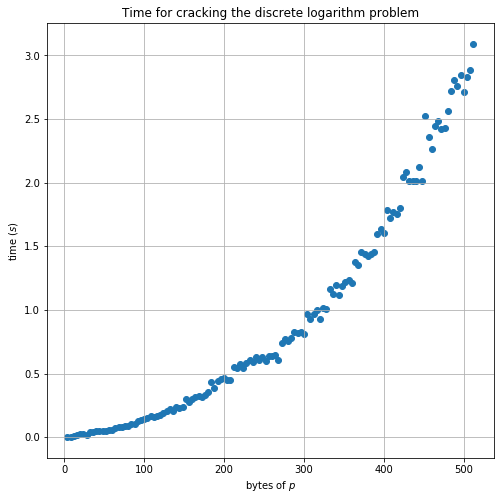

In [146]:
plt.clf()

bits = [x[0] for x in times]
t = [x[1] for x in times]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(bits, t)

ax.set_title("Time for cracking the discrete logarithm problem")
ax.set_xlabel("bytes of $p$")
ax.set_ylabel("time ($s$)")
#ax.set_yscale('log')

plt.grid()